In [22]:
import glob
import pandas
import pdb
import numpy

from Optimizer import TrainOptimizer
from Stock import Stock
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
stockfiles = glob.glob('Data/Stocks/*.csv')
indexfile = 'Data/FTSE/FTSE-100 Index.csv'
stocks = {}
epics = {}

for index, filename in enumerate(stockfiles):
    epic = filename.split('/')[-1].split('.')[0]
    data = pandas.read_csv(filename, names=['Date', 'ClosingPrice'], skiprows=[0])
    stock = Stock(epic, data)
    
    stocks[index] = stock
    epics[index] = epic

indexepic = indexfile.split('/')[1].split('.')[0].split(' ')[0]
data = pandas.read_csv(indexfile, usecols=['Date', 'Adj Close'])
data.columns = ['Date', 'ClosingPrice']
index = Stock(indexepic, data)

opt = TrainOptimizer(index, stocks)
opt.train(train_interval=[0, 2500], validate_interval=[2500, 2700], test_interval=[2700, 2800])
best = opt.best_portfolio()

PerformanceEvaluator.py:90: RuntimeWarning: invalid value encountered in double_scalars
  er = ((a - b) / np.sqrt(np.var(c)))


In [3]:
weights = dict(zip(best[0], best[1]))

# Visuals

In [4]:
data = map(lambda X: (index.dates[X], index.prices[X]), index.prices)
data = pandas.DataFrame(data)
data.index = data[0]
data.index = pandas.to_datetime(data.index)
data.drop(0, axis=1, inplace=True)
data.columns = ['FTSE']

In [5]:
for stock in stocks.values():
    d = map(lambda X: (stock.dates[X], stock.prices[X]), stock.prices)
    d = pandas.DataFrame(d)
    d.index = d[0]
    d.index = pandas.to_datetime(d.index)
    d.drop(0, axis=1, inplace=True)
    
    names = data.columns.tolist()
    names.append(stock.epic)
    data = pandas.concat([data, d], ignore_index=True, axis=1)
    data.columns = names

In [6]:
data.index.name = 'Date'
data.dropna(axis=0, thresh=5, inplace=True)
data.to_csv('Data/COLLECT.csv')

In [7]:
fdata = data['2015-01-02':]

In [8]:
print weights

{'VOD': 0.010942030894284692, 'GLEN': 0.11320392730643651, 'AZN': 0.024624792217351033, 'DGE': 0.098796436676682642, 'RDSA': 0.027080073228593432, 'HSBA': 0.077442126936948505, 'PRU': 0.085003820007142766, 'RIO': 0.057171508275360688, 'BATS': 0.10871949374313984, 'RB': 0.030495105658510817, 'LLOY': 0.033834449417077785, 'BP': 0.095786679952036241, 'GSK': 0.04905119028033577, 'ULVR': 0.10088139714109763, 'SHP': 0.086966968265001554}


In [9]:
weight_vector = map(lambda X: weights[X], sorted(weights))
fdata['SyFTSE'] = numpy.dot(fdata[fdata.columns[1:]].sort(axis=1), weight_vector)
fdata.tail()

/home/dvlper/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  
/home/dvlper/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FTSE,VOD,ULVR,GSK,RIO,AZN,DGE,RB,BATS,RDSA,GLEN,BP,PRU,LLOY,SHP,HSBA,SyFTSE
Date,,,,,,,,,,,,,,,,,
2017-11-20,7389.5,229.50,4199.5,1313.5,3547.5,4960.5,2589.0,6380.0,5002.0,2331.0,359.85,492.00,1882.0,66.12,3579.0,729.5,2490.666490
2017-11-21,7411.3,229.75,4227.5,1303.0,3573.0,5036.0,2601.0,6401.0,5091.0,2330.0,362.10,494.30,1915.0,65.72,3632.0,729.6,2515.654426
2017-11-22,7419.0,228.75,4188.5,1302.5,3633.0,5007.0,2581.5,6492.0,5029.0,2331.5,363.50,497.85,1877.0,65.90,3752.0,738.8,2516.972268
2017-11-23,7417.2,225.40,4232.5,1305.5,3664.0,4999.5,2615.0,6420.0,5049.0,2339.0,364.05,500.90,1882.5,65.72,3735.0,731.8,2525.396010
2017-11-24,7409.6,225.50,4261.0,1297.5,3655.0,4983.0,2622.5,6470.0,5004.0,2337.5,362.35,501.30,1883.0,66.09,3711.0,735.7,2522.407399


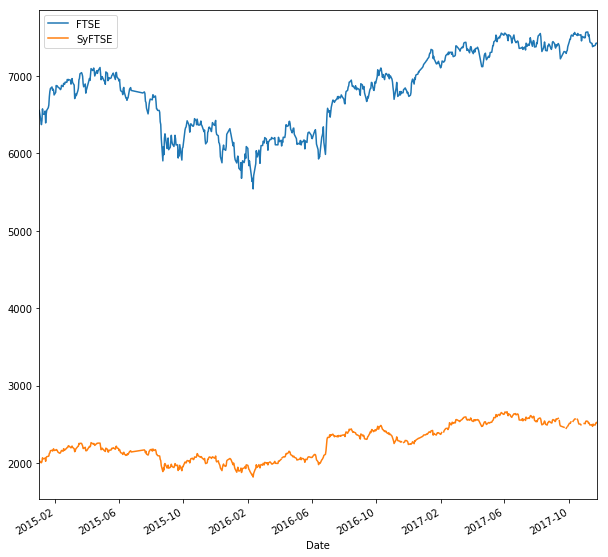

In [10]:
# data = data.cumsum()
plt.figure()
fdata.FTSE.plot(figsize=(10, 10))
fdata.SyFTSE.plot(figsize=(10, 10))
plt.legend(loc='best')

In [12]:
fdata.drop(['VOD', 'ULVR', 'GSK', 'RIO', 'AZN', 'DGE', 'RB', 'BATS', 'RDSA', 'GLEN', 'BP', 'PRU', 'LLOY', 'SHP', 'HSBA'], axis=1, inplace=True)

/home/dvlper/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
ndata = fdata.copy()
ndata = (ndata - ndata.mean()) / (ndata.max() - ndata.min())

In [19]:
ndata+=100

In [21]:
ndata.head()

,FTSE,SyFTSE
Date,,
2015-01-02,99.878485,99.727390
2015-01-05,99.814000,99.695630
2015-01-06,99.788967,99.693476
2015-01-07,99.815284,99.712487
2015-01-08,99.889446,99.769273


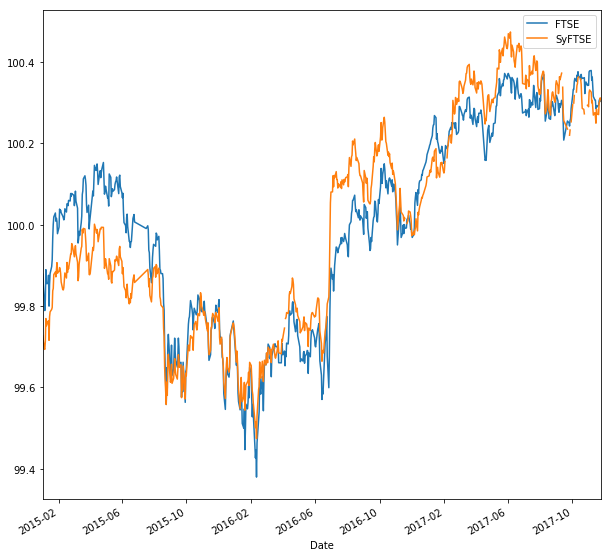

In [20]:
# data = data.cumsum()
plt.figure()
ndata.FTSE.plot(figsize=(10, 10))
ndata.SyFTSE.plot(figsize=(10, 10))
plt.legend(loc='best')

In [26]:
ndata.dropna(inplace=True)
rms = numpy.sqrt(mean_squared_error(ndata.FTSE, ndata.SyFTSE))

In [27]:
rms

0.092145725353632774